In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [157]:
models = {"sinrelpos": "20210505-171306",
         "sinpos": "20210506-171158",
         "nopos": "20210506-212457",
#          "cape 1000,0.5,1": "20210507-163937",
#          "cape 1000,0,1": "20210510-144531",
#           "cape 1000,5,1": "20210510-145636",
#           "cape 1000,0,1 epoch 2x": "20210510-152026",
#           "cape 250,0,1": "20210510-153301",
          "mix 2 35len, 1000,0.5,1": "../debug/20210510-194433", # learning
          "mix 3": "cape_mix_3/20210510-213626",
          "mix 4": "cape_mix_4/20210510-213626/",
          "mix 3 2x epoch": "cape_mix_3_epoch250/20210510-213631/",
          "mix 3 3x epoch": "cape_mix_3_epoch375/20210510-213631/",
          "mix 5": "cape_mix_5/20210510-213632/",
          "cape_mix_3_epoch375_dpi0-3": "cape_mix_3_epoch375_dpi0-3/20210510-220652",
          
#           "cape_glshift_250_dpi_on_wemb_only": "cape_glshift_250_dpi_on_wemb_only/20210510-225723/",
#           "cape_glshift_1000_epoch375": "cape_glshift_1000_epoch375/20210511-022243"
#           "cape_glshift_250_dpi0-4 ": "cape_glshift_250_dpi0-4/20210510-220621/",
          "emb dp 0": "20210510-202248",
#           "emb dp 0.2": "20210510-201105"
}


In [112]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/ptb_gab/code/"

In [155]:
def plot_training(path, label):
    ppl = []
    epochs = []
    updates = []
    batches = []
    with open(path, "r") as f:
        for line in f:
            if "| epoch" in line:
                res = line.split("|")[1:]
                epochs.append(int(res[0].strip().split(" ")[-1]))
                batches.append(int(res[1].strip().split("/")[0]))
                updates.append(epochs[-1] * 1327 + batches[-1])
                ppl.append(float(res[5].strip().split(" ")[-1]))
    plt.plot(updates, ppl, label=label)
    

def plot_valid(path, label):
    epochs = []
    ppl = []
    with open(path, "r") as f:
        for line in f:
            if "end of epoch" in line:
                res = line.split("|")[1:]
                epochs.append(int(res[0].strip().split(" ")[-1]))
                ppl.append(float(res[3].strip().split(" ")[-1]))
    plt.plot(epochs, ppl, label=label)

(40.0, 200.0)

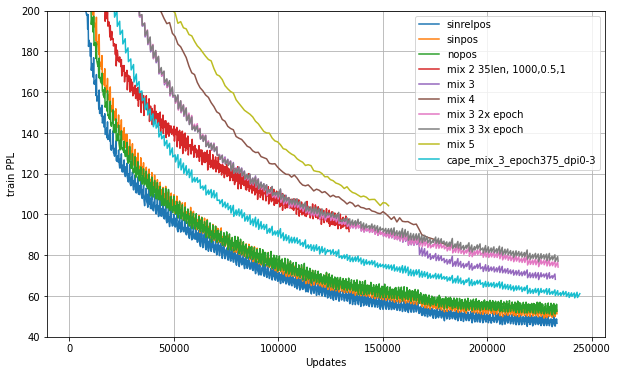

In [156]:
plt.figure(figsize=(10, 6))
plt.grid()
for label, path in models.items():
    plot_training(prefix + "TFM/" + path + "/log.txt", label)

plt.legend()
plt.xlabel("Updates")
plt.ylabel("train PPL")
plt.ylim(40, 200)

(0.0, 300.0)

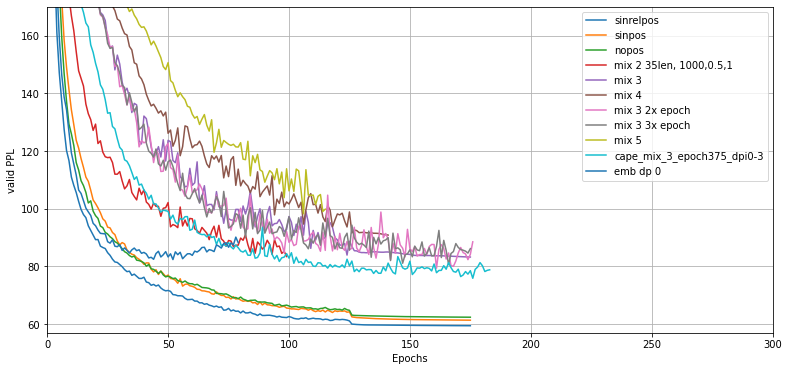

In [158]:
plt.figure(figsize=(13, 6))
plt.grid()
for label, path in models.items():
    plot_valid(prefix + "TFM/" + path + "/log.txt", label)

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("valid PPL")
plt.ylim(57, 170)
plt.xlim(0, 300)

# v2

In [278]:
models_v2 = !ls /checkpoint/antares/experiments/fl_new_master/augposemb/ptb_gab/code/v2/*/*/log.txt

(59.0, 69.0)

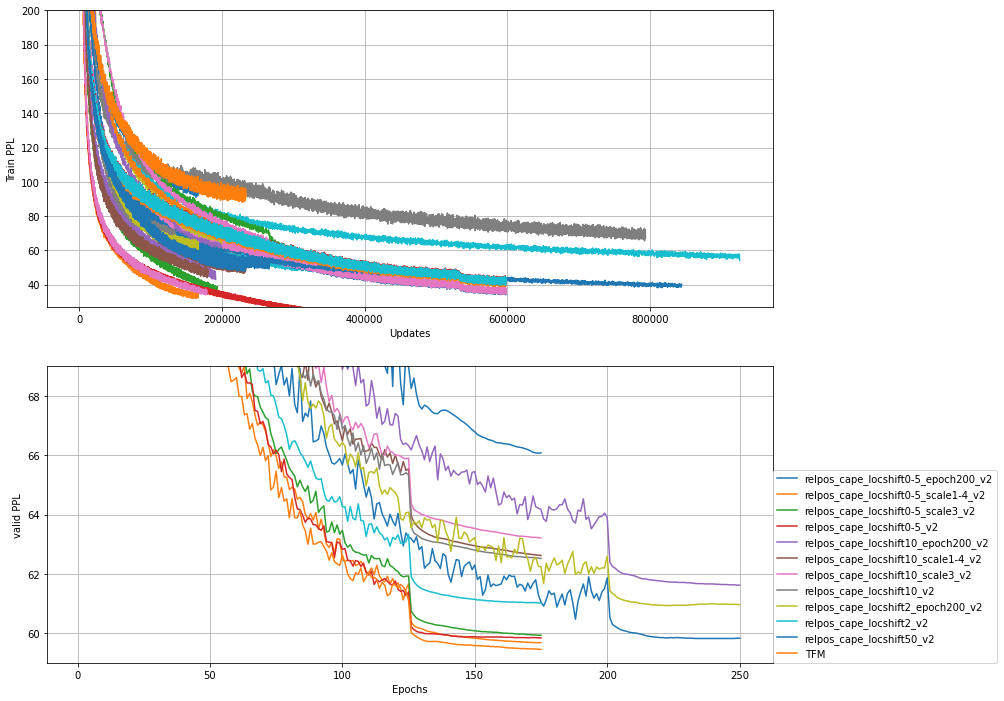

In [299]:
plt.figure(figsize=(13, 12))
plt.subplot(2, 1, 1)
for m in models_v2:
    if "sinpos" not in m and "relpos" not in m:
        plot_training(m, m.split("/")[-3])
    
plt.grid()
plt.xlabel("Updates")
plt.ylabel("Train PPL")
plt.ylim(27, 200)
# plt.xlim(0, 300)

plt.subplot(2, 1, 2)
for m in models_v2 + ["/checkpoint/antares/experiments/fl_new_master/augposemb/ptb_gab/code/TFM/20210505-171306/log.txt"]:
#     if "sinpos" not in m and "relpos" not in m:
#     if "cape" in m and "mix" not in m:
    if ("relpos_cape" in m and "_v2" in m) or "TFM" in m:
        plot_valid(m, m.split("/")[-3])
    
plt.grid()
plt.legend(loc=(1, 0))
plt.xlabel("Epochs")
plt.ylabel("valid PPL")
plt.ylim(59, 69)
# plt.xlim(0, 180)

In [300]:
words = set()
with open("/datasets01/wikitext/060817/wikitext-2/wiki.train.tokens", "r") as f:
    for line in f:
        words.update(line.strip().split(" "))

In [318]:
words_valid = set()
with open("/datasets01/wikitext/060817/wikitext-2/wiki.valid.tokens", "r") as f:
    for line in f:
        words_valid.update(line.strip().split(" "))

In [319]:
len(words), len(words_valid)

(33278, 13777)

In [301]:
len(words)

33278

In [302]:
import json

In [307]:
with open("/checkpoint/antares/experiments/fl_new_master/augposemb/vocab.json", "r") as f:
    a = json.load(f)

In [309]:
len(a)

50257

In [311]:
len(words - set(a.keys()))

27592

In [315]:
a_new = []
for s in a.keys():
    if "Ġ" == s[0]:
        a_new.append(s[1:])
    else:
        a_new.append(s)
a_new = set(a_new)

In [316]:
len(words - a_new)

13393

In [313]:
a.keys()

dict_keys(['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'Ā', 'ā', 'Ă', 'ă', 'Ą', 'ą', 'Ć', 'ć', 'Ĉ', 'ĉ'